In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [2]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
db_sorted = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
ii=2
data_dir_full = db_sorted['data_dir_full'][ii]
ani = db_sorted.index[ii][0]#'e15_13f1'#'e13_26m1'
sess=db_sorted['sess_name'][ii]#'e15_13f1_220117'#'e13_26m1_210913'
print(sess)

e15_13f1_220118


In [4]:
# load data
mat_to_return=prep.load_stuff(data_dir_full)
# sessionPulses=mat_to_return['sessionPulses']
# filtered = mat_to_return['filtered']
behavior=mat_to_return['behavior']
ripples = mat_to_return['ripples']
sleep_state_episodes = mat_to_return['SleepStateEpisodes']
cell_metrics=mat_to_return['cell_metrics']
mergepoints = mat_to_return['mergepoints']
cell_type_mask = mat_to_return['cell_type_mask']
res_all_epochs_d, ripple_time_ints_epochs_d = prep.get_spike_count_rate_participation_in_ripple_all(cell_metrics,
                                                                                                    ripples,
                                                                                                    mergepoints,
                                                                                                   )



prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
spk_beh_df=prep_res['spk_beh_df']
_,spk_beh_df=dpp.group_into_trialtype(spk_beh_df)
cell_cols_d = prep_res['cell_cols_d']
# beh_df = prep_res['beh_df']
# beh_df_d,beh_df=dpp.group_into_trialtype(beh_df)
spike_trains = prep_res['spike_trains']

In [5]:
ripple_peak_times=ripples.peaks

In [ ]:
one_trial=

In [205]:
spike_trains

  Index    rate  celltype              ispyr    isint
-------  ------  ------------------  -------  -------
      1    0.56  Pyramidal Cell            1        0
      2    3.78  Wide Interneuron          0        1
      3   17.75  Narrow Interneuron        0        1
      4    5.82  Narrow Interneuron        0        1
      5   19.79  Narrow Interneuron        0        1
      6   21.68  Narrow Interneuron        0        1
      7   19.1   Narrow Interneuron        0        1
      8   17.03  Narrow Interneuron        0        1
      9   20.93  Narrow Interneuron        0        1
     10   20.09  Narrow Interneuron        0        1
     11   17.3   Narrow Interneuron        0        1
     12   17.78  Narrow Interneuron        0        1
     13   16.04  Narrow Interneuron        0        1
     14   19.79  Narrow Interneuron        0        1
     15   16.61  Narrow Interneuron        0        1
     16   16.08  Narrow Interneuron        0        1
     17   14.43  Narrow Inte

In [6]:
from replay_trajectory_classification import (SortedSpikesDecoder, ClusterlessDecoder,
                                              SortedSpikesClassifier, ClusterlessClassifier)


Cupy is not installed or GPU is not detected. Ignore this message if not using GPU


In [7]:
SortedSpikesDecoder.fit?


In [8]:
from replay_trajectory_classification.sorted_spikes_simulation import make_simulated_run_data

time, position, sampling_frequency, spikes, place_fields = make_simulated_run_data()

In [11]:
spike_ind

array([     1,     76,    164, ..., 359848, 359901, 359969])

In [12]:
spk_beh_df.groupby()

,1,2,3,4,5,6,7,8,9,10,...,theta_data,trial_type,segment,dist_to_maze,off_track,on_track,off_track_event,pause_event,directed_locomotion,low_speed
284,0,0,0,0,0,1,1,2,0,2,...,43.708976,"(0, 1.0)",0.0,0.578365,False,True,False,False,True,False
285,0,0,1,0,4,2,2,2,1,0,...,1015.728105,"(0, 1.0)",0.0,0.553636,False,True,False,False,True,False
286,0,0,1,0,2,3,3,1,2,0,...,-828.802027,"(0, 1.0)",0.0,0.573968,False,True,False,False,True,False
287,0,0,1,0,0,1,2,0,1,3,...,-739.719858,"(0, 1.0)",0.0,0.599070,False,True,False,False,True,False
288,0,0,1,0,0,0,1,0,0,0,...,985.267877,"(0, 1.0)",0.0,0.658755,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119559,0,1,0,0,0,1,0,1,3,1,...,-238.211544,"(1, 1)",NaN,7.687833,True,False,False,False,False,True
119560,0,0,0,0,4,1,0,2,0,0,...,477.385377,"(1, 1)",NaN,7.562980,True,False,False,False,False,True
119561,0,0,0,1,2,0,1,2,1,3,...,-362.998612,"(1, 1)",NaN,7.361771,True,False,False,False,False,True
119562,0,1,0,1,2,0,2,1,1,4,...,-305.539631,"(1, 1)",NaN,7.183059,True,False,False,False,False,True


In [76]:


import logging
import os

import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Make analysis reproducible
np.random.seed(0)

# Enable logging
logging.basicConfig(level=logging.INFO)



from replay_trajectory_classification.sorted_spikes_simulation import make_simulated_run_data

time, position, sampling_frequency, spikes, place_fields = make_simulated_run_data()



In [110]:
spk_beh_df_sub = spk_beh_df.query("task_index==0&visitedArm==0")
# position = spk_beh_df_sub[['x','y']].values
position = spk_beh_df_sub['lin'].values
spikes = spk_beh_df_sub[cell_cols_d['pyr']].values
time = spk_beh_df_sub['time'].values

In [174]:
spk_beh_df_sub_test=spk_beh_df.query("task_index==0&visitedArm==1")
position_test = spk_beh_df_sub_test['lin'].values
spikes_test = spk_beh_df_sub_test[cell_cols_d['pyr']].values
time_test = spk_beh_df_sub_test['time'].values

In [201]:
%%time
environment = Environment(place_bin_size=2.2)
transition_type = RandomWalk(movement_var=0.25)

decoder = SortedSpikesDecoder(
    environment=environment,
    transition_type=transition_type,
    sorted_spikes_algorithm='spiking_likelihood_kde',
    sorted_spikes_algorithm_params={'block_size': None,
                                    'position_std': 3.0},
)
train_ma = (spk_beh_df_sub['directed_locomotion']==1)&(spk_beh_df_sub['trial']<=2).values
# train_ma = (spk_beh_df_sub['directed_locomotion']==1).values

decoder.fit(position, spikes,is_training=train_ma)
# decoder.fit(position, spikes,is_training=None)



INFO:replay_trajectory_classification.decoder:Fitting initial conditions...
INFO:replay_trajectory_classification.decoder:Fitting state transition...
INFO:replay_trajectory_classification.decoder:Fitting place fields...


CPU times: user 195 ms, sys: 0 ns, total: 195 ms
Wall time: 193 ms


SortedSpikesDecoder(environment=Environment(environment_name='', place_bin_size=2.2, track_graph=None, edge_order=None, edge_spacing=None, is_track_interior=None, position_range=None, infer_track_interior=True, fill_holes=False, dilate=False, bin_count_threshold=0),
                    infer_track_interior=True,
                    initial_conditions_type=UniformInitialConditions(),
                    sorted_spikes_algorithm='spiking_likelihood_kde',
                    sorted_spikes_algorithm_params={'block_size': None,
                                                    'position_std': 3.0},
                    transition_type=RandomWalk(environment_name='', movement_var=0.25, movement_mean=0.0, use_diffusion=False))

In [135]:
spk_beh_df_sub.groupby('trial')['time'].count()

trial
1.0     1491
3.0     1528
4.0      778
6.0     4336
7.0     1411
9.0     3075
10.0    1145
12.0    2367
14.0    2220
16.0    2404
18.0    1213
20.0    6984
22.0    2242
23.0    2326
24.0    2569
25.0    1755
26.0    3868
Name: time, dtype: int64

In [202]:
time_ind=slice(5000,20000)
results = decoder.predict(spikes[time_ind],time=time[time_ind])
# results = decoder.predict(spikes_test[time_ind],time=time_test[time_ind])

INFO:replay_trajectory_classification.decoder:Estimating likelihood...


  0%|          | 0/318 [00:00<?, ?it/s]

INFO:replay_trajectory_classification.decoder:Estimating causal posterior...
INFO:replay_trajectory_classification.decoder:Estimating acausal posterior...


In [101]:
results

<xarray.Dataset>
Dimensions:            (time: 2000, position: 89)
Coordinates:
  * time               (time) float64 5.667e+03 5.667e+03 ... 5.77e+03 5.77e+03
  * position           (position) float64 1.247 3.74 6.233 ... 215.7 218.2 220.7
Data variables:
    likelihood         (time, position) float64 1.0 0.1521 ... 0.000162
    causal_posterior   (time, position) float64 0.8668 0.1319 ... 0.0 0.0
    acausal_posterior  (time, position) float64 0.002044 0.9979 ... 0.0 0.0
Attributes:
    data_log_likelihood:  -5921.289766569459

(6200.0, 6400.0)

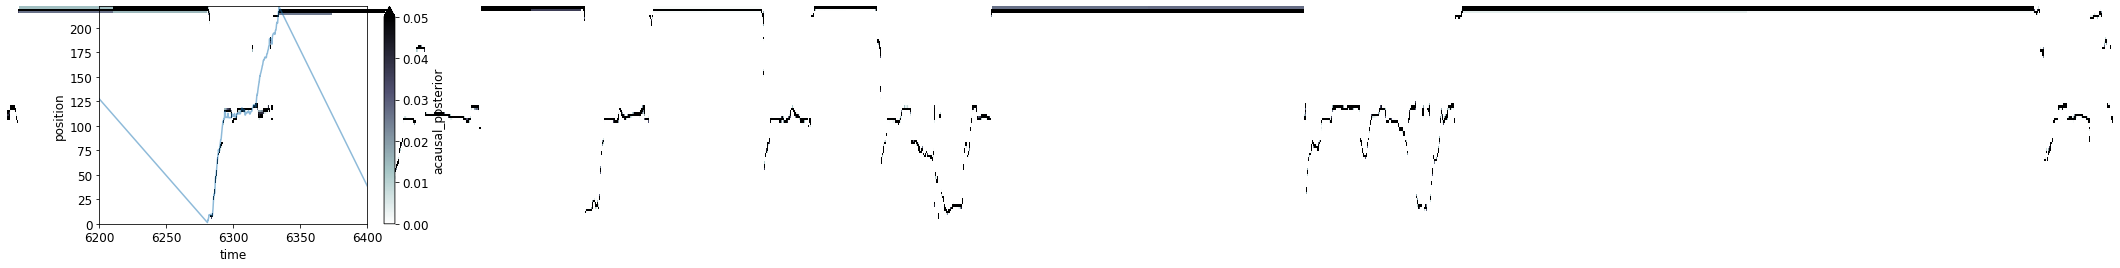

In [200]:
fig,ax=plt.subplots()
results.acausal_posterior.plot(x="time", y="position", ax=ax,
                               robust=True, cmap="bone_r", vmin=0.0, vmax=0.05,
                               clip_on=False)
# ax.plot(time[time_ind],position[time_ind])
ax.plot(time_test[time_ind],position_test[time_ind],alpha=0.5)
ax.set_xlim([6200,6400])

(6200.0, 6300.0)

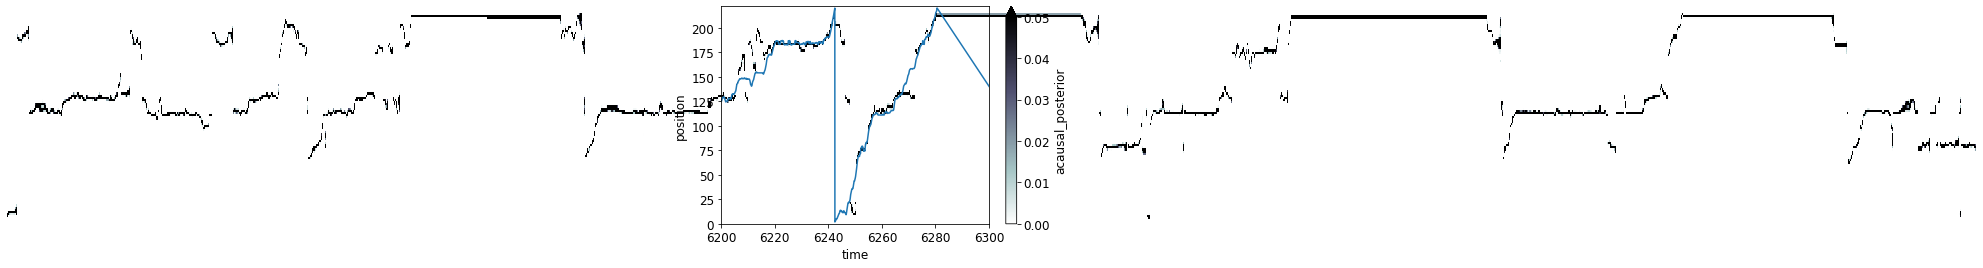

In [204]:
fig,ax=plt.subplots()
results.acausal_posterior.plot(x="time", y="position", ax=ax,
                               robust=True, cmap="bone_r", vmin=0.0, vmax=0.05,
                               clip_on=False)
ax.plot(time[time_ind],position[time_ind],alpha=1)
# ax.plot(time_test[time_ind],position_test[time_ind],alpha=0.5)
ax.set_xlim([6200,6300])

(6200.0, 6300.0)

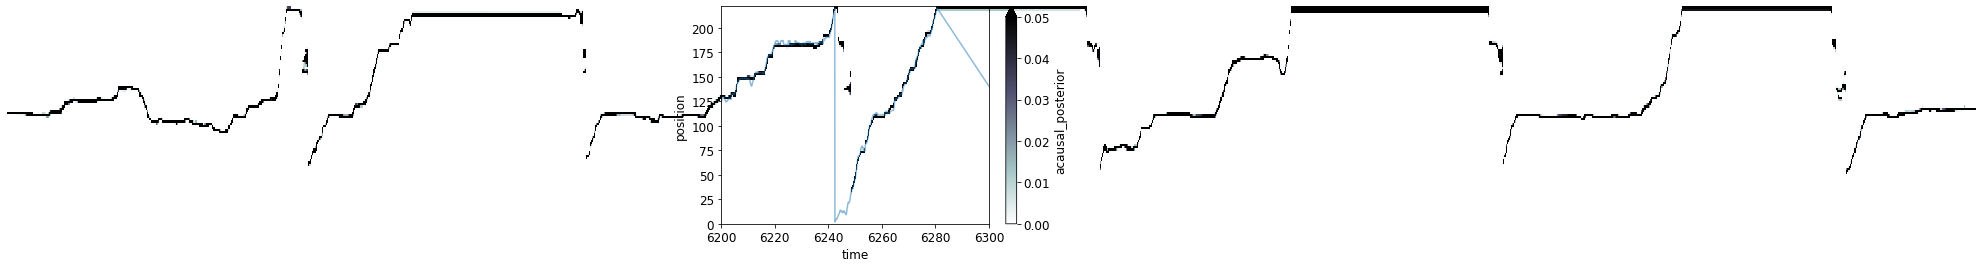

In [193]:
fig,ax=plt.subplots()
results.acausal_posterior.plot(x="time", y="position", ax=ax,
                               robust=True, cmap="bone_r", vmin=0.0, vmax=0.05,
                               clip_on=False)
ax.plot(time[time_ind],position[time_ind],alpha=0.5)
# ax.plot(time_test[time_ind],position_test[time_ind],alpha=0.5)
ax.set_xlim([6200,6300])

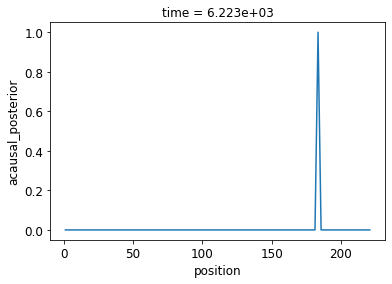

In [173]:
results.acausal_posterior.sel(time=6223,method='nearest').plot()

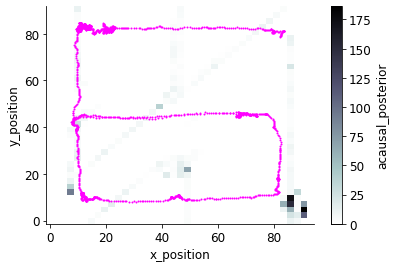

In [87]:
results.acausal_posterior.sum('time').plot(x='x_position', y='y_position', cmap='bone_r')
plt.scatter(position[time_ind, 0], position[time_ind, 1], color='magenta', s=1, clip_on=False, label='True Position')
sns.despine()



<Axes: >

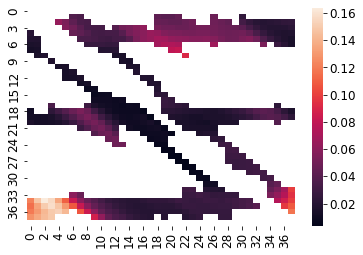

In [97]:
sns.heatmap(results.likelihood.mean(axis=0))

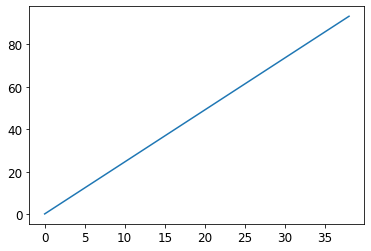

In [90]:
plt.plot(results['x_position'])

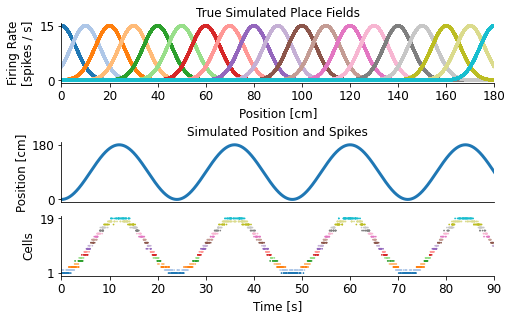

In [15]:
MM_TO_INCHES = 1.0 / 25.4
ONE_COLUMN = 89.0 * MM_TO_INCHES
ONE_AND_HALF_COLUMN = 140.0 * MM_TO_INCHES
TWO_COLUMN = 178.0 * MM_TO_INCHES
PAGE_HEIGHT = 247.0 * MM_TO_INCHES
GOLDEN_RATIO = (np.sqrt(5) - 1.0) / 2.0

STATE_COLORS = {
    'stationary': '#9f043a',
    'fragmented': '#ff6944',
    'continuous': '#521b65',
    'stationary-continuous-mix': '#61c5e6',
    'fragmented-continuous-mix': '#2a586a',
    '': '#c7c7c7',
}


spike_ind, neuron_ind = np.nonzero(spikes)
cmap = plt.get_cmap('tab20')

fig, axes = plt.subplots(3, 1, figsize=(TWO_COLUMN, TWO_COLUMN * GOLDEN_RATIO), constrained_layout=True)
for place_field, color in zip(place_fields.T, cmap.colors):
    axes[0].plot(position, place_field, linewidth=3, color=color)
axes[0].set_xlabel('Position [cm]')
axes[0].set_ylabel('Firing Rate\n[spikes / s]')
axes[0].set_title('True Simulated Place Fields')
axes[0].set_xlim((position.min(), position.max()))
axes[0].set_yticks([0, np.round(place_fields.max())])

axes[1].plot(time, position, linewidth=3)
axes[1].set_ylabel('Position [cm]')
axes[1].set_title('Simulated Position and Spikes')
axes[1].set_yticks([0, np.round(position.max())])
axes[1].set_xticks([])
axes[1].set_xlim((0.0, 90.0))

c = [cmap.colors[ind] for ind in neuron_ind]
axes[2].scatter(time[spike_ind], neuron_ind + 1, c=c, s=0.5)
axes[2].set_yticks((1, spikes.shape[1]))
axes[2].set_ylabel('Cells')

axes[2].set_xlabel('Time [s]')
axes[2].set_xlim((0.0, 90.0))

sns.despine()

In [16]:


from replay_trajectory_classification import SortedSpikesDecoder, Environment, RandomWalk, estimate_movement_var

movement_var = estimate_movement_var(position, sampling_frequency)

environment = Environment(place_bin_size=np.sqrt(movement_var))
transition_type = RandomWalk(movement_var=movement_var)

decoder = SortedSpikesDecoder(
    environment=environment,
    transition_type=transition_type,
    sorted_spikes_algorithm='spiking_likelihood_kde',
    sorted_spikes_algorithm_params={'block_size': None,
                                    'position_std': [3.0],
                                    'use_diffusion': False},
)
decoder.fit(position, spikes)



INFO:replay_trajectory_classification.decoder:Fitting initial conditions...
INFO:replay_trajectory_classification.decoder:Fitting state transition...
INFO:replay_trajectory_classification.decoder:Fitting place fields...


SortedSpikesDecoder(environment=Environment(environment_name='', place_bin_size=0.5268625668325884, track_graph=None, edge_order=None, edge_spacing=None, is_track_interior=None, position_range=None, infer_track_interior=True, fill_holes=False, dilate=False, bin_count_threshold=0),
                    infer_track_interior=True,
                    initial_conditions_type=UniformInitialConditions(),
                    sorted_spikes_algorithm='spiking_likelihood_kde',
                    sorted_spikes_algorithm_params={'block_size': None,
                                                    'position_std': [3.0],
                                                    'use_diffusion': False},
                    transition_type=RandomWalk(environment_name='', movement_var=0.2775841643294236, movement_mean=0.0, use_diffusion=False))

In [25]:
decoder.place_fields_

<xarray.DataArray (position: 342, neuron: 19)>
array([[0.0146893 , 0.00592344, 0.00021617, ..., 0.        , 0.        ,
        0.        ],
       [0.0144644 , 0.00613825, 0.00024234, ..., 0.        , 0.        ,
        0.        ],
       [0.01420782, 0.00639076, 0.00027595, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00019678, 0.00588007,
        0.01433882],
       [0.        , 0.        , 0.        , ..., 0.00016516, 0.00562208,
        0.01445369],
       [0.        , 0.        , 0.        , ..., 0.00014009, 0.00540576,
        0.01454125]], dtype=float32)
Coordinates:
  * position  (position) float32 0.2632 0.7895 1.316 1.842 ... 178.7 179.2 179.7
Dimensions without coordinates: neuron

In [30]:
spikes

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
place_fields.shape

(360000, 19)

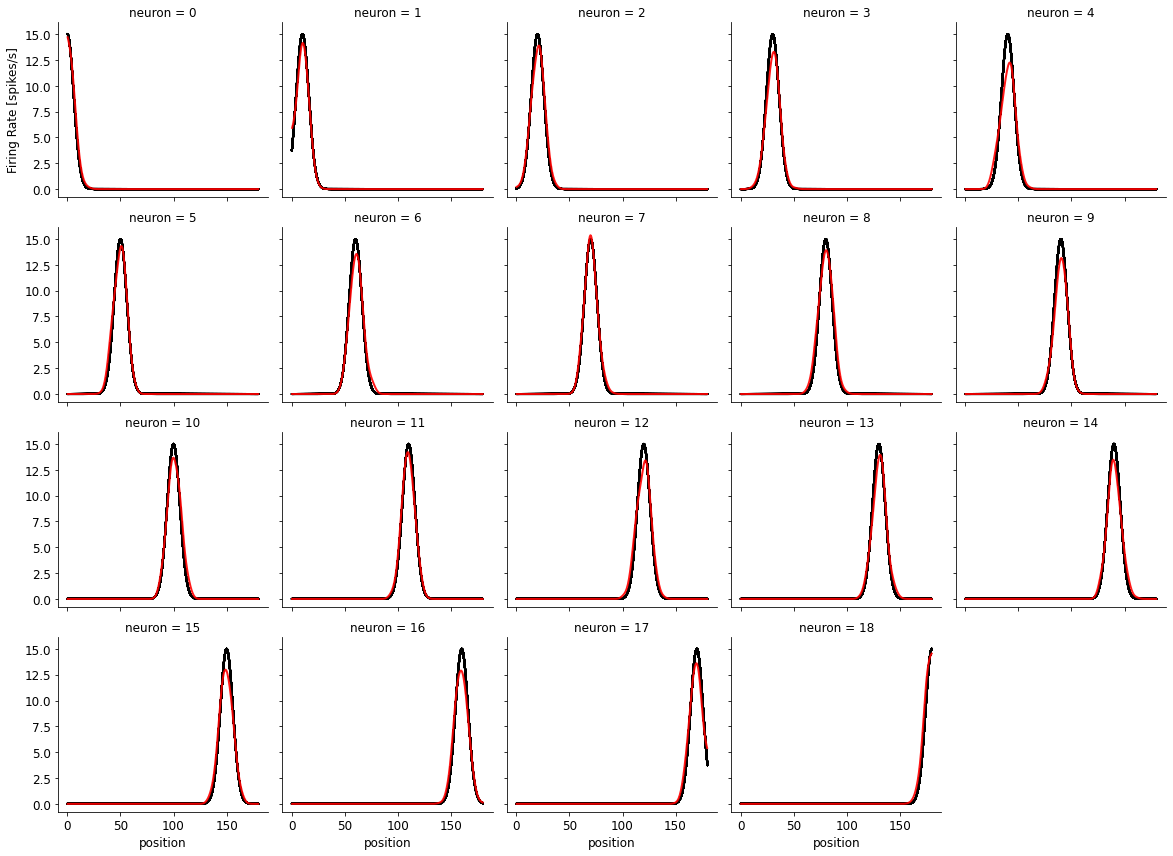

In [46]:
g = (decoder.place_fields_ * sampling_frequency).plot(
        x="position", col="neuron", col_wrap=5, color="red", linewidth=2, alpha=0.9, zorder=1, label="Predicted")
g.axes[0, 0].set_ylabel("Firing Rate [spikes/s]")
for ax, place_field in zip(g.axes.flat, place_fields.T):
    ax.plot(position, place_field, linewidth=2, color="black", zorder=-1, label="True")
sns.despine()

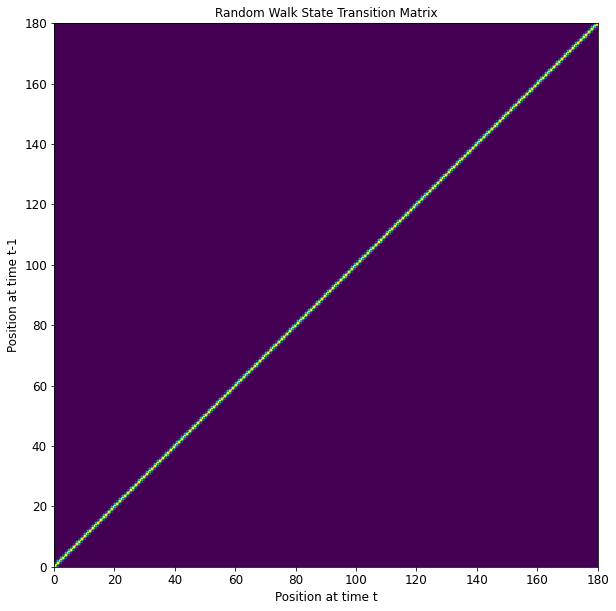

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

edge1, edge2 = np.meshgrid(decoder.environment.place_bin_edges_, decoder.environment.place_bin_edges_)
ax.pcolormesh(edge1, edge2, decoder.state_transition_.T, vmin=0.0, vmax=np.percentile(decoder.state_transition_, 99.9))
ax.set_title("Random Walk State Transition Matrix")
ax.set_ylabel("Position at time t-1")
ax.set_xlabel("Position at time t")
ax.axis("square");


In [36]:
place_fields[:,3]

array([5.58998276e-05, 5.58999713e-05, 5.59004023e-05, ...,
       5.59011207e-05, 5.59004023e-05, 5.58999713e-05])

In [53]:
time_ind = slice(0, 50000)

results = decoder.predict(spikes[time_ind], time=time[time_ind])
results

INFO:replay_trajectory_classification.decoder:Estimating likelihood...


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:replay_trajectory_classification.decoder:Estimating causal posterior...
INFO:replay_trajectory_classification.decoder:Estimating acausal posterior...


<xarray.Dataset>
Dimensions:            (time: 50000, position: 342)
Coordinates:
  * time               (time) float64 0.0 0.001 0.002 0.003 ... 50.0 50.0 50.0
  * position           (position) float64 0.2632 0.7895 1.316 ... 179.2 179.7
Data variables:
    likelihood         (time, position) float64 0.9993 0.9992 ... 0.9998 1.0
    causal_posterior   (time, position) float64 0.002929 0.002929 ... 1.699e-168
    acausal_posterior  (time, position) float64 0.046 0.06159 ... 1.699e-168
Attributes:
    data_log_likelihood:  -726.8598819779158

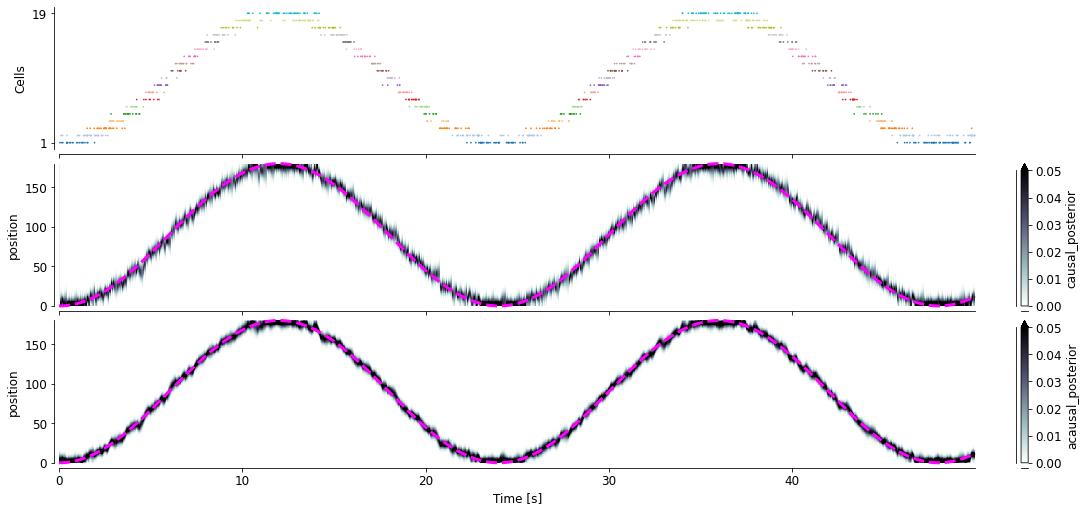

In [54]:


fig, axes = plt.subplots(3, 1, sharex=True, constrained_layout=True, figsize=(15, 7))

spike_ind, neuron_ind = np.nonzero(spikes[time_ind])
c = [cmap.colors[ind] for ind in neuron_ind]
axes[0].scatter(time[spike_ind], neuron_ind + 1, c=c, s=0.5, clip_on=False)
axes[0].set_yticks((1, spikes.shape[1]))
axes[0].set_ylabel('Cells')

results.causal_posterior.plot(x="time", y="position", ax=axes[1], cmap="bone_r", vmin=0.0, vmax=0.05, clip_on=False)
axes[1].plot(time[time_ind], position[time_ind], color="magenta", linestyle="--", linewidth=3, clip_on=False)
axes[1].set_xlabel("")
results.acausal_posterior.plot(x="time", y="position", ax=axes[2], cmap="bone_r", vmin=0.0, vmax=0.05, clip_on=False)
axes[2].plot(time[time_ind], position[time_ind], color="magenta", linestyle="--", linewidth=3, clip_on=False)
axes[2].set_xlabel('Time [s]')
sns.despine(offset=5)

